# Pandas

In [52]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import collections

### Make Columns like Dictionaries

In [53]:
df = pd.DataFrame({'col_1':[0,1,2], 'col_2':[0,1,2], 'col_3':[1,2,3]})
df.head()

col_1  col_2  col_3
0      0      0      1
1      1      1      2
2      2      2      3

## Append Columns

In [54]:
df2 = pd.DataFrame({'amount spent':[0,1,2], 'date':['11/11/1111', '22/22/2222', '33/33/3333'], 'amount bought':['1/8th', '1 g', '1 g']})

new_value = [0,1,2]

for index, row in df2.iterrows():
     df2.at[index, 'new_column'] = new_value[index]

df2

amount spent        date amount bought  new_column
0             0  11/11/1111         1/8th         0.0
1             1  22/22/2222           1 g         1.0
2             2  33/33/3333           1 g         2.0

In [55]:
df2['another_new_column'] = ['hey', 'yo', 'what\'s up'] #The column has to match the length of the number of rows

new_row = {'amount spent':69, 'date':'44/44/4444', 'amount bought':'2 g', 'new_column':3, 'another_new_column':'not much'} # a new row has to match the number of columns

df2 = df2.append(new_row, ignore_index=True)

df2

amount spent        date amount bought  new_column another_new_column
0             0  11/11/1111         1/8th         0.0                hey
1             1  22/22/2222           1 g         1.0                 yo
2             2  33/33/3333           1 g         2.0          what's up
3            69  44/44/4444           2 g         3.0           not much

## Display DataFrame with Tabulate

In [56]:
cool_fmts = ['psql', 'html', 'fancy_grid', 'latex_raw'] # fancy grid is the best by far

for i in range(len(cool_fmts)):
    print('Format: ' + cool_fmts[i])
    print(tabulate(df, tablefmt = cool_fmts[i])) # the important line
    print('\n')

Format: psql
+---+---+---+---+
| 0 | 0 | 0 | 1 |
| 1 | 1 | 1 | 2 |
| 2 | 2 | 2 | 3 |
+---+---+---+---+


Format: html
<table>
<tbody>
<tr><td style="text-align: right;">0</td><td style="text-align: right;">0</td><td style="text-align: right;">0</td><td style="text-align: right;">1</td></tr>
<tr><td style="text-align: right;">1</td><td style="text-align: right;">1</td><td style="text-align: right;">1</td><td style="text-align: right;">2</td></tr>
<tr><td style="text-align: right;">2</td><td style="text-align: right;">2</td><td style="text-align: right;">2</td><td style="text-align: right;">3</td></tr>
</tbody>
</table>


Format: fancy_grid
╒═══╤═══╤═══╤═══╕
│ 0 │ 0 │ 0 │ 1 │
├───┼───┼───┼───┤
│ 1 │ 1 │ 1 │ 2 │
├───┼───┼───┼───┤
│ 2 │ 2 │ 2 │ 3 │
╘═══╧═══╧═══╧═══╛


Format: latex_raw
\begin{tabular}{rrrr}
\hline
 0 & 0 & 0 & 1 \\
 1 & 1 & 1 & 2 \\
 2 & 2 & 2 & 3 \\
\hline
\end{tabular}




## Generate Fake Data and Plot

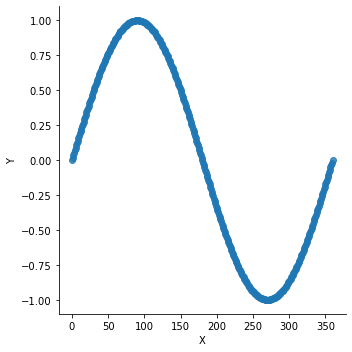

In [57]:
plot = pd.DataFrame({'X':np.linspace(0,360,361), 'Y':[np.sin(2*np.pi*(i) / 360) for i in range(361)]})
sns.lmplot('X', 'Y', data=plot, fit_reg=False)

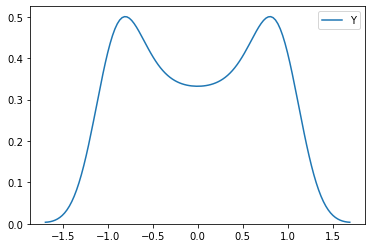

In [46]:
sns.kdeplot(plot.Y)

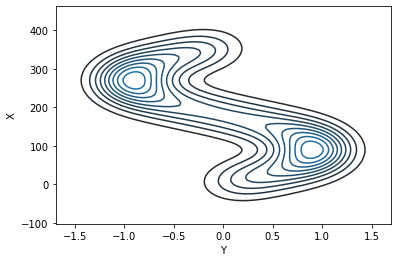

In [47]:
sns.kdeplot(plot.Y, plot.X)

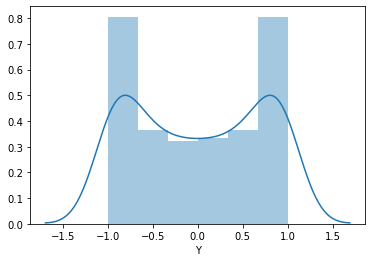

In [48]:
sns.distplot(plot.Y)

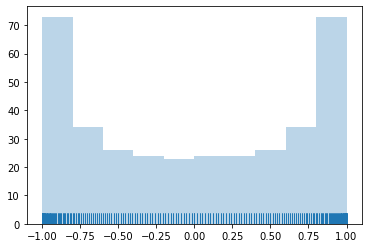

In [49]:
plt.hist(plot.Y, alpha=.3)
sns.rugplot(plot.Y);

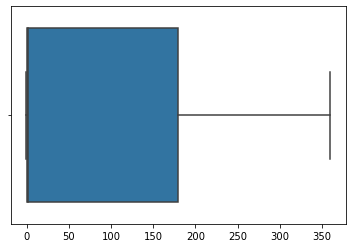

In [50]:
sns.boxplot([plot.Y, plot.X])

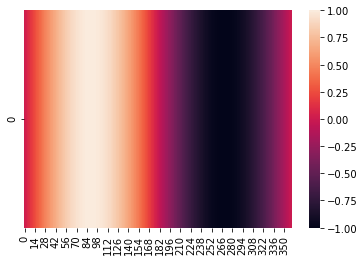

In [51]:
sns.heatmap([plot.Y])

# Play with an OpenBCI File

In [99]:
# load data
file = "OpenBCI-RAW-2021-08-07_00-58-55.txt"
f = open(file)
meta_data = [f.readline() for i in range(4)]
print(meta_data)

egg_df = pd.read_csv(file, skiprows=[0,1,2,3])
egg_df

['%OpenBCI Raw EEG Data\n', '%Number of channels = 16\n', '%Sample Rate = 125 Hz\n', '%Board = OpenBCI_GUI$BoardCytonSerialDaisy\n']


Sample Index   EXG Channel 0   EXG Channel 1   EXG Channel 2  \
0              0.0    1.066907e+06   954082.781250   -1.124961e+06   
1            100.0    1.067698e+06   954602.062500   -1.124951e+06   
2            102.0    1.067284e+06   954259.781250   -1.124409e+06   
3            104.0    1.067470e+06   954572.531250   -1.125160e+06   
4            106.0    1.067348e+06   954260.343750   -1.124418e+06   
...            ...             ...             ...             ...   
4199          82.0   -1.288025e+06  -739150.359375   -7.603039e+05   
4200          84.0   -1.288163e+06  -739210.406250   -7.603768e+05   
4201          86.0   -1.288280e+06  -739267.828125   -7.604267e+05   
4202          88.0   -1.288478e+06  -739384.218750   -7.605565e+05   
4203          90.0   -1.288600e+06  -739448.625000   -7.606118e+05   

       EXG Channel 3   EXG Channel 4   EXG Channel 5   EXG Channel 6  \
0      -1.053963e+06   280728.609375  -766681.593750   -77670.339844   
1      -1.054198e+06   292696.078125  -767634.890625   -76992.281250   
2      -1.053324e+06   277518.539062  -768332.250000   -76854.416016   
3      -1.054353e+06   295240.429688  -765719.250000   -77409.632812   
4      -1.053258e+06   274964.531250  -770253.796875   -76687.042969   
...              ...             ...             ...             ...   
4199   -1.055782e+06  -821746.875000  -872247.468750  -883992.375000   
4200   -1.055886e+06  -821785.500000  -872286.093750  -884054.062500   
4201   -1.055988e+06  -821875.593750  -872379.937500  -884133.375000   
4202   -1.056152e+06  -821980.687500  -872481.375000  -884253.562500   
4203   -1.056258e+06  -822069.281250  -872578.968750  -884338.312500   

       EXG Channel 7   EXG Channel 8  ...   Other.2   Other.3   Other.4  \
0     -382024.921875        0.000000  ...       0.0       0.0       0.0   
1     -381970.195312    71718.521484  ...      32.0      15.5      56.0   
2     -381229.898438    69693.451172  ...       0.0       0.0       0.0   
3     -382227.679688    71856.386719  ...       0.0       0.0       0.0   
4     -381372.070312    69513.205078  ...       0.0       0.0       0.0   
...              ...             ...  ...       ...       ...       ...   
4199  -941785.312500     -550.925766  ...      24.0      15.0      64.0   
4200  -941860.500000     -551.998672  ...       0.0       0.0       0.0   
4201  -941930.718750     -551.462219  ...       0.0       0.0       0.0   
4202  -942067.031250     -551.462219  ...       0.0       0.0       0.0   
4203  -942143.718750     -551.462219  ...       0.0       0.0       0.0   

       Other.5   Other.6   Analog Channel 0   Analog Channel 1  \
0          0.0       0.0                0.0                0.0   
1          0.0     120.0                0.0                0.0   
2          0.0       0.0                0.0                0.0   
3          0.0       0.0                0.0                0.0   
4          0.0       0.0                0.0                0.0   
...        ...       ...                ...                ...   
4199       3.5       0.0                0.0                0.0   
4200       0.0       0.0                0.0                0.0   
4201       0.0       0.0                0.0                0.0   
4202       0.0       0.0                0.0                0.0   
4203       0.0       0.0                0.0                0.0   

       Analog Channel 2     Timestamp     Timestamp (Formatted)  
0                   0.0  1.628320e+09   2021-08-07 00:58:55.471  
1                   0.0  1.628320e+09   2021-08-07 00:58:55.471  
2                   0.0  1.628320e+09   2021-08-07 00:58:55.471  
3                   0.0  1.628320e+09   2021-08-07 00:58:55.471  
4                   0.0  1.628320e+09   2021-08-07 00:58:55.471  
...                 ...           ...                       ...  
4199                0.0  1.628320e+09   2021-08-07 00:59:28.789  
4200                0.0  1.628320e+09   2021-08-07 00:59:28.789  
4201        

In [102]:
# egg_df[' EXG Channel 0']
# egg_df.reset_index(inplace=True) # use this to make a new column for index, but don't use it more than once
egg_df

index  Sample Index   EXG Channel 0   EXG Channel 1   EXG Channel 2  \
0         0           0.0    1.066907e+06   954082.781250   -1.124961e+06   
1         1         100.0    1.067698e+06   954602.062500   -1.124951e+06   
2         2         102.0    1.067284e+06   954259.781250   -1.124409e+06   
3         3         104.0    1.067470e+06   954572.531250   -1.125160e+06   
4         4         106.0    1.067348e+06   954260.343750   -1.124418e+06   
...     ...           ...             ...             ...             ...   
4199   4199          82.0   -1.288025e+06  -739150.359375   -7.603039e+05   
4200   4200          84.0   -1.288163e+06  -739210.406250   -7.603768e+05   
4201   4201          86.0   -1.288280e+06  -739267.828125   -7.604267e+05   
4202   4202          88.0   -1.288478e+06  -739384.218750   -7.605565e+05   
4203   4203          90.0   -1.288600e+06  -739448.625000   -7.606118e+05   

       EXG Channel 3   EXG Channel 4   EXG Channel 5   EXG Channel 6  \
0      -1.053963e+06   280728.609375  -766681.593750   -77670.339844   
1      -1.054198e+06   292696.078125  -767634.890625   -76992.281250   
2      -1.053324e+06   277518.539062  -768332.250000   -76854.416016   
3      -1.054353e+06   295240.429688  -765719.250000   -77409.632812   
4      -1.053258e+06   274964.531250  -770253.796875   -76687.042969   
...              ...             ...             ...             ...   
4199   -1.055782e+06  -821746.875000  -872247.468750  -883992.375000   
4200   -1.055886e+06  -821785.500000  -872286.093750  -884054.062500   
4201   -1.055988e+06  -821875.593750  -872379.937500  -884133.375000   
4202   -1.056152e+06  -821980.687500  -872481.375000  -884253.562500   
4203   -1.056258e+06  -822069.281250  -872578.968750  -884338.312500   

       EXG Channel 7  ...   Other.2   Other.3   Other.4   Other.5   Other.6  \
0     -382024.921875  ...       0.0       0.0       0.0       0.0       0.0   
1     -381970.195312  ...      32.0      15.5      56.0       0.0     120.0   
2     -381229.898438  ...       0.0       0.0       0.0       0.0       0.0   
3     -382227.679688  ...       0.0       0.0       0.0       0.0       0.0   
4     -381372.070312  ...       0.0       0.0       0.0       0.0       0.0   
...              ...  ...       ...       ...       ...       ...       ...   
4199  -941785.312500  ...      24.0      15.0      64.0       3.5       0.0   
4200  -941860.500000  ...       0.0       0.0       0.0       0.0       0.0   
4201  -941930.718750  ...       0.0       0.0       0.0       0.0       0.0   
4202  -942067.031250  ...       0.0       0.0       0.0       0.0       0.0   
4203  -942143.718750  ...       0.0       0.0       0.0       0.0       0.0   

       Analog Channel 0   Analog Channel 1   Analog Channel 2     Timestamp  \
0                   0.0                0.0                0.0  1.628320e+09   
1                   0.0                0.0                0.0  1.628320e+09   
2                   0.0                0.0                0.0  1.628320e+09   
3                   0.0                0.0                0.0  1.628320e+09   
4                   0.0                0.0                0.0  1.628320e+09   
...                 ...                ...                ...           ...   
4199                0.0                0.0                0.0  1.628320e+09   
4200                0.0                0.0                0.0  1.628320e+09   
4201                0.0                0.0                0.0  1.628320e+09   
4202                0.0                0.0                0.0  1.628320e+09   
4203                0.0                0.0                0.0  1.628320e+09   

         Timestamp (Formatted)  
0      2021-08-07 00:58:55.471  
1      2021-08-07 00:58:55.471  
2      2021-08-07 00:58:55.471  
3      2021-08-07 00:58:55.471  
4      2021-08-07 00:58:55.471  
...                        ...  
4199   2021-08-07 00:59:28.789  
4200   2021-08-07 00:59:28.789  
4201   2021-08-07 00:

In [103]:
# plot = pd.DataFrame({'X':np.linspace(0,360,361), 'Y':[np.sin(2*np.pi*(i) / 360) for i in range(361)]})
# sns.lmplot('X', 'Y', data=plot, fit_reg=False)

sample_rate = 125



sns.lmplot(egg_df['index'], " EXG Channel 0", data=egg_df, fit_reg=False) #fix the fact that the EXG data is stored as a string type variable

TypeError: Invalid comparison between dtype=int64 and str